In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
df1=pd.read_csv('airlines.csv')
df1

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [3]:
conn = sqlite3.connect('flight_delay.db')

In [4]:
df1.to_sql('airlines', conn, if_exists='replace', index=False)


14

In [5]:
df2=pd.read_csv('cancellation_codes.csv')
df2

,CANCELLATION_REASON,CANCELLATION_DESCRIPTION
0,A,Airline/Carrier
1,B,Weather
2,C,National Air System
3,D,Security


In [6]:
df2.to_sql('cancel', conn, if_exists='replace', index=False)


4

In [7]:
df3=pd.read_csv('airports.csv')
df3

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [8]:
df3.to_sql('airports', conn, if_exists='replace', index=False)


322

In [9]:
# Define the chunk size
chunksize = 1000000

dtypes = {'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}
df_list = []
for chunk in pd.read_csv('flights.csv', chunksize=chunksize, dtype=dtypes, low_memory=False):
    df_list.append(chunk)
Flights= pd.concat(df_list)

In [11]:
Flights.to_sql('flights', conn, if_exists='replace', index=False)
     

5819079

In [48]:

Flights.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4714887,2015,10,21,3,WN,1111,N373SW,11140,12191,1805,...,1932.0,27.0,0,0,NaN,11.0,0.0,6.0,10.0,0.0
3029636,2015,7,9,4,EV,4269,N13969,DCA,CLE,1431,...,1556.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2283730,2015,5,25,1,WN,3928,N257WN,LAS,LAX,1720,...,1920.0,60.0,0,0,NaN,11.0,0.0,0.0,49.0,0.0
1721217,2015,4,20,1,EV,5192,N146PQ,MLI,ATL,1701,...,1954.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
963936,2015,3,5,4,OO,6401,N738SK,EUG,SFO,615,...,749.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
Flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

# Data Preprocessing


In [14]:
df1.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [15]:
df2.isnull().sum()

CANCELLATION_REASON         0
CANCELLATION_DESCRIPTION    0
dtype: int64

In [16]:
df3.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

##### Latitude and Longitude have 3 null values

In [17]:
Percentage_of_value_missing=Flights.isnull().mean()*100
Percentage_of_value_missing

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

##### Data Cleaning

In [18]:
df3['LATITUDE'].value_counts()

LATITUDE
40.65236    1
48.25938    1
38.50887    1
29.99339    1
44.88055    1
           ..
40.69250    1
35.07297    1
38.03799    1
44.12326    1
32.65658    1
Name: count, Length: 319, dtype: int64

In [19]:
df3['LATITUDE']=df3['LATITUDE'].fillna("df3['LATITUDE'].mean()",inplace=True)

In [20]:
df3['LATITUDE'].isnull().sum()

322

In [21]:
df3['LONGITUDE']=df3['LONGITUDE'].fillna("df3['LONGITUDE'].mean()",inplace=True)

In [22]:
df3['LONGITUDE'].isnull().sum()

322

##### For Flights

In [23]:
cols=[var for var in Flights.columns if Flights[var].isnull().mean()*100 < 5 and Flights[var].isnull().mean()*100>0]
cols

['TAIL_NUMBER',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'WHEELS_ON',
 'TAXI_IN',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY']

In [24]:
len(Flights[cols].dropna())/len(Flights)

0.9819437062119281

In [25]:
cols1=[var for var in Flights.columns if Flights[var].isnull().mean()*100 > 5 and Flights[var].isnull().mean()*100<100]
cols1

['CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

##### No of Total Flights - 5819079

No of cancelled flights - 89884

No of Null CANCELLATION_REASON = (5819079-89884) = 5729195

No of Delayed flights - 1063439

No of Null in Delay reason - (5,819,079-1063439) = 4755640

Other Nulls are also been caused by Either delay or cancellation, Also we won't be diving into those columns.

##### These columns have large numbers of missing values so drop or fill it with any method is not suitable

### Duplicated Values

In [26]:
Duplicate1=df1.duplicated().sum()
Duplicate1

0

In [27]:
Duplicate2=df2.duplicated().sum()
Duplicate2

0

In [28]:
Duplicate3=df3.duplicated().sum()
Duplicate3

0

In [29]:
Duplicate4=Flights.duplicated().sum()
Duplicate4

0

###### There is no duplicate values in any tables

# Number of Flights by each Airlines

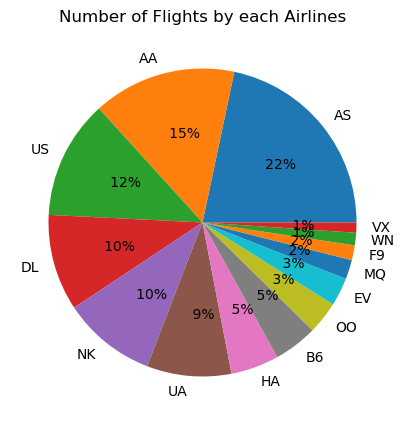

In [134]:
axis = plt.subplots(figsize=(5,5))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.title('Number of Flights by each Airlines')
plt.show()

In [65]:
No_Of_Flights_by_each_Airline = pd.read_sql_query("SELECT COUNT(*) as Total_Flights,al.AIRLINE FROM flights f INNER JOIN airlines al ON f.AIRLINE = al.IATA_CODE group by al.AIRLINE ", conn)
No_Of_Flights_by_each_Airline.sort_values('Total_Flights',ascending=False)        

,Total_Flights,AIRLINE
9,1261855,Southwest Airlines Co.
4,875881,Delta Air Lines Inc.
1,725984,American Airlines Inc.
8,588353,Skywest Airlines Inc.
3,571977,Atlantic Southeast Airlines
12,515723,United Air Lines Inc.
2,294632,American Eagle Airlines Inc.
7,267048,JetBlue Airways
11,198715,US Airways Inc.
0,172521,Alaska Airlines Inc.


<function matplotlib.pyplot.show(close=None, block=None)>

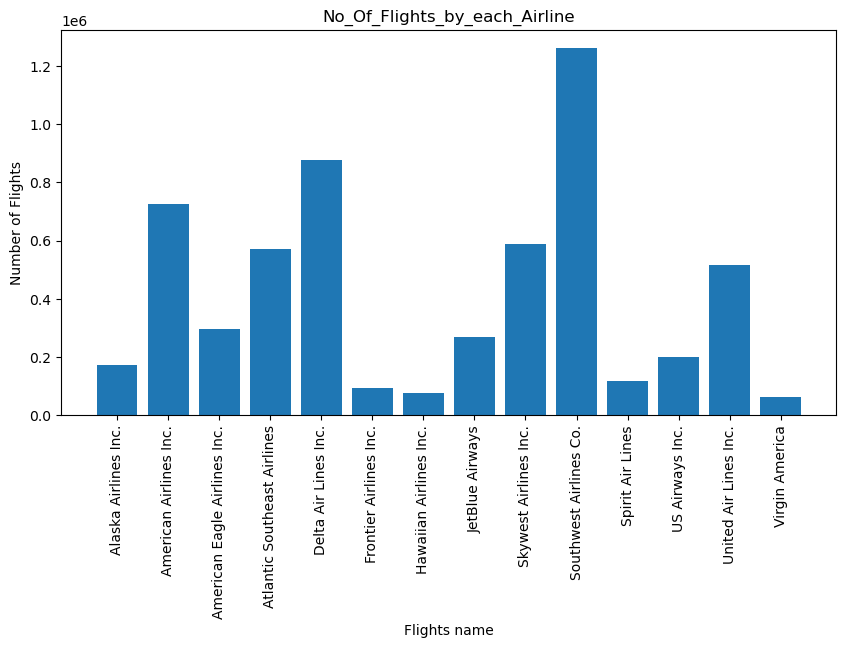

In [137]:
axis = plt.subplots(figsize=(10,5))
airlines=No_Of_Flights_by_each_Airline['AIRLINE']
Counts=No_Of_Flights_by_each_Airline['Total_Flights']
plt.xlabel('Flights name')
plt.ylabel('Number of Flights')
plt.bar(airlines,Counts)
plt.xticks(rotation=90)
plt.title('No_Of_Flights_by_each_Airline')
plt.show

###### Number Of Flights by Each Month


In [33]:
No_Of_Flights_by_each_Month = pd.read_sql_query("SELECT COUNT(*),f.MONTH FROM flights as f group by f.MONTH ", conn)
No_Of_Flights_by_each_Month  

,COUNT(*),MONTH
0,469968,1
1,429191,2
2,504312,3
3,485151,4
4,496993,5
5,503897,6
6,520718,7
7,510536,8
8,464946,9
9,486165,10


<function matplotlib.pyplot.show(close=None, block=None)>

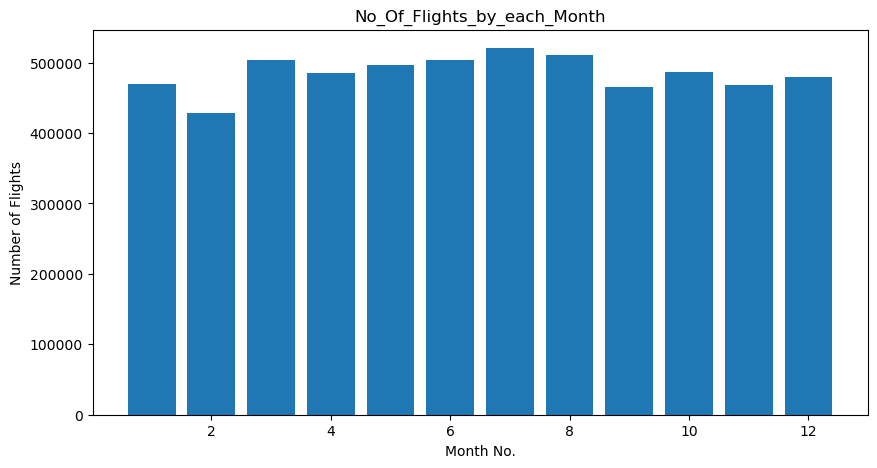

In [138]:
axis = plt.subplots(figsize=(10,5))
Months=No_Of_Flights_by_each_Month['MONTH']
Counts=No_Of_Flights_by_each_Month['COUNT(*)']
plt.xlabel('Month No.')
plt.ylabel('Number of Flights')
plt.bar(Months,Counts)
plt.title('No_Of_Flights_by_each_Month')

plt.show

###### Number Of Flights by Each Day

In [35]:
No_Of_Flights_by_each_Day = pd.read_sql_query("SELECT COUNT(*),f.DAY FROM flights as f group by f.DAY ", conn)
No_Of_Flights_by_each_Day  

,COUNT(*),DAY
0,189477,1
1,195986,2
2,190007,3
3,190893,4
4,189766,5
5,191232,6
6,187598,7
7,193964,8
8,194224,9
9,189288,10


<function matplotlib.pyplot.show(close=None, block=None)>

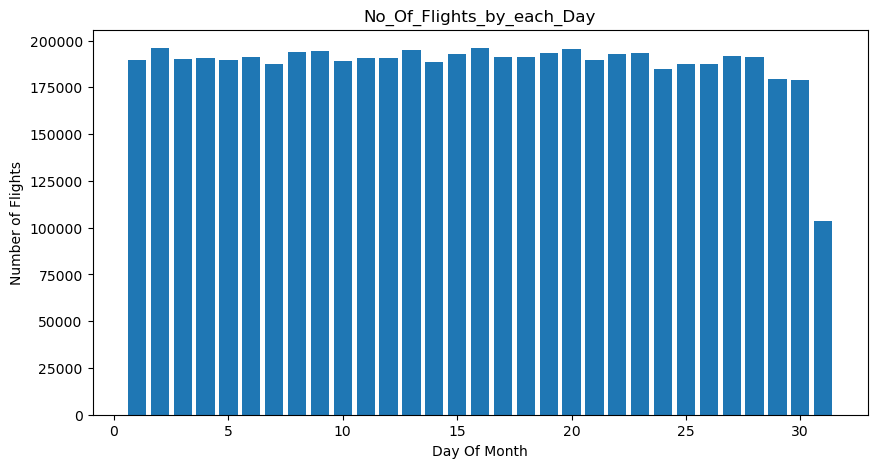

In [140]:
axis = plt.subplots(figsize=(10,5))
Day=No_Of_Flights_by_each_Day['DAY']
Counts=No_Of_Flights_by_each_Day['COUNT(*)']
plt.xlabel('Day Of Month')
plt.ylabel('Number of Flights')
plt.bar(Day,Counts)
plt.title('No_Of_Flights_by_each_Day')

plt.show

##### Day Of Week

### Number of Flights Cancelled

In [143]:
No_Of_Flights_by_Day_of_Week = pd.read_sql_query("SELECT COUNT(*),DAY_OF_WEEK FROM flights group by DAY_OF_WEEK ", conn)
No_Of_Flights_by_Day_of_Week  

,COUNT(*),DAY_OF_WEEK
0,865543,1
1,844600,2
2,855897,3
3,872521,4
4,862209,5
5,700545,6
6,817764,7


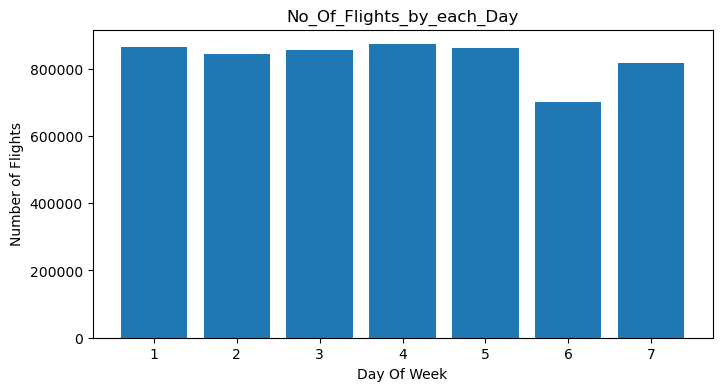

In [147]:
axis = plt.subplots(figsize=(8,4))
Day_of_week=No_Of_Flights_by_Day_of_Week['DAY_OF_WEEK']
Counts=No_Of_Flights_by_Day_of_Week['COUNT(*)']
plt.xlabel('Day Of Week')
plt.ylabel('Number of Flights')
plt.bar(Day_of_week,Counts)
plt.title('No_Of_Flights_by_each_Day')
plt.show()

## Number of Flight Cancelled

In [57]:
Number_of_Flights_Cancelled= pd.read_sql_query("SELECT COUNT(*) as Flight_cancel,al.AIRLINE FROM Flights as f inner join airlines as al on f.AIRLINE=al.IATA_CODE where f.CANCELLED=1 group by al.AIRLINE", conn)
Number_of_Flights_Cancelled.sort_values('Flight_cancel',ascending=False)

,Flight_cancel,AIRLINE
9,16043,Southwest Airlines Co.
3,15231,Atlantic Southeast Airlines
2,15025,American Eagle Airlines Inc.
1,10919,American Airlines Inc.
8,9960,Skywest Airlines Inc.
12,6573,United Air Lines Inc.
7,4276,JetBlue Airways
11,4067,US Airways Inc.
4,3824,Delta Air Lines Inc.
10,2004,Spirit Air Lines


<function matplotlib.pyplot.show(close=None, block=None)>

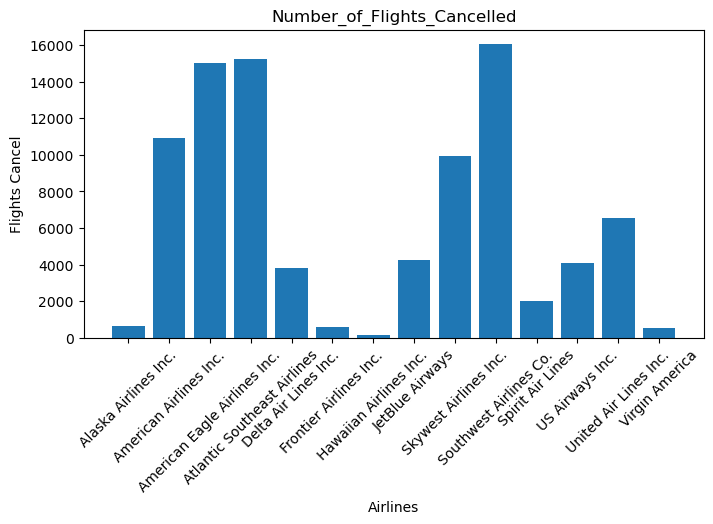

In [148]:
axis = plt.subplots(figsize=(8,4))
Airlines=Number_of_Flights_Cancelled['AIRLINE']
Flight_Cancel=Number_of_Flights_Cancelled['Flight_cancel']
plt.xlabel('Airlines')
plt.ylabel('Flights Cancel')
plt.bar(Airlines,Flight_Cancel)
plt.xticks(rotation=45)
plt.title('Number_of_Flights_Cancelled')
plt.show

##### Cancellation Reason

In [72]:
Cancellation_Reason=pd.read_sql_query("Select count(*) as Cancellation_count, c.CANCELLATION_DESCRIPTION from Flights as f inner join cancel c on c.CANCELLATION_REASON=f.CANCELLATION_REASON group by c.CANCELLATION_REASON ",conn)
Cancellation_Reason.sort_values('Cancellation_count',ascending=False)

,Cancellation_count,CANCELLATION_DESCRIPTION
1,48851,Weather
0,25262,Airline/Carrier
2,15749,National Air System
3,22,Security


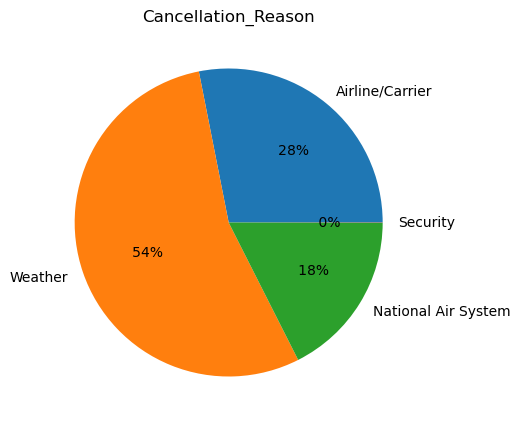

In [75]:
axis = plt.subplots(figsize=(5,5))
Name =Cancellation_Reason["CANCELLATION_DESCRIPTION"]
size = Cancellation_Reason["Cancellation_count"]
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.title('Cancellation_Reason')
plt.show()

#### Flights Cancel by Airlines

In [165]:
Flights_Cancel_by_Airlines=pd.read_sql_query("select count(*) as Flights_Cancel, al.AIRLINE from Flights as f inner join airlines as al on f.AIRLINE = al.IATA_CODE WHERE CANCELLED = 1 and CANCELLATION_REASON = 'A'group by al.AIRLINE",conn)
Flights_Cancel_by_Airlines.sort_values('Flights_Cancel',ascending=False)

,Flights_Cancel,AIRLINE
9,6122,Southwest Airlines Co.
3,3604,Atlantic Southeast Airlines
8,3205,Skywest Airlines Inc.
1,2879,American Airlines Inc.
12,2870,United Air Lines Inc.
2,2475,American Eagle Airlines Inc.
11,1007,US Airways Inc.
7,883,JetBlue Airways
10,654,Spirit Air Lines
4,594,Delta Air Lines Inc.


<function matplotlib.pyplot.show(close=None, block=None)>

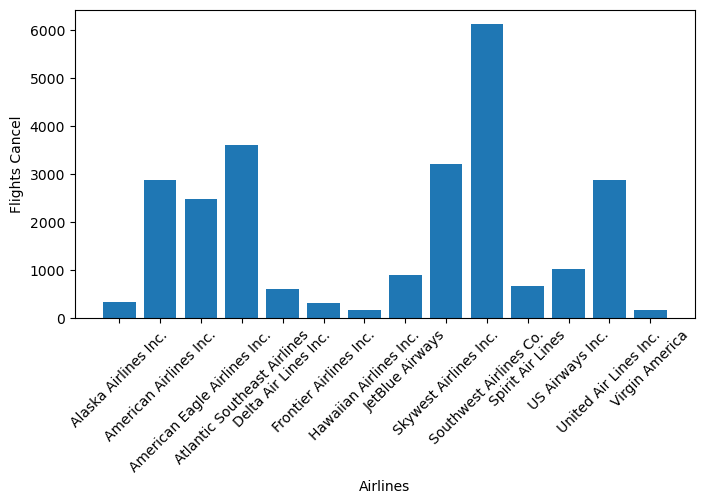

In [167]:
axis = plt.subplots(figsize=(8,4))
Airlines=Flights_Cancel_by_Airlines['AIRLINE']
Flight_Cancel_Count=Flights_Cancel_by_Airlines['Flights_Cancel']
plt.xlabel('Airlines')
plt.ylabel('Flights Cancel')
plt.bar(Airlines,Flight_Cancel_Count)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

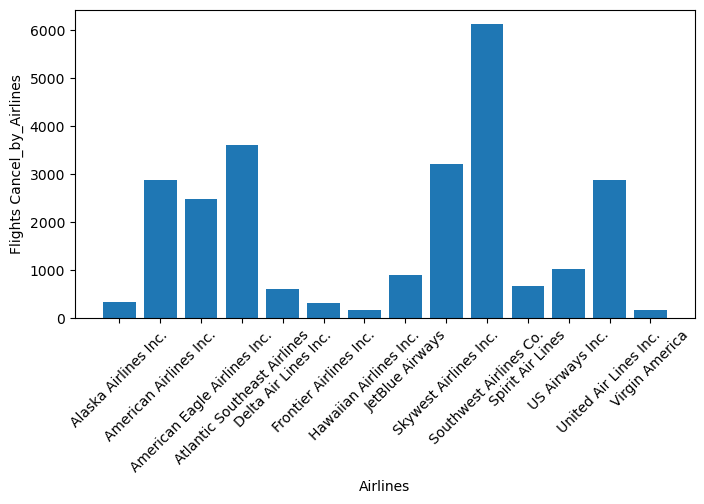

In [97]:
axis = plt.subplots(figsize=(8,4))
Airlines=Flights_Cancel_by_Airlines['AIRLINE']
Flight_Cancel=Flights_Cancel_by_Airlines['Flights_Cancel']
plt.xlabel('Airlines')
plt.ylabel('Flights Cancel_by_Airlines')
plt.bar(Airlines,Flight_Cancel)
plt.xticks(rotation=45)
plt.title('Flights_Cancel_by_Airlines')
plt.show

## Percentage of flights in experienced a departure delay in 2015. Among those flights, what was the average delay time, in minutes

In [110]:
Departure_delay=pd.read_sql_query("select count(*) as Departure_delay from Flights where DEPARTURE_DELAY>0 ",conn)
Departure_delay

,Departure_delay
0,2125618


In [112]:
Flights['DEPARTURE_DELAY'].value_counts()

DEPARTURE_DELAY
-3.0       455407
-4.0       444053
-5.0       438844
-2.0       435237
-1.0       387475
            ...  
 1079.0         1
 1347.0         1
-61.0           1
 859.0          1
 1649.0         1
Name: count, Length: 1217, dtype: int64

In [113]:
Departure_delay_per_flight=pd.read_sql_query("select count(*) as Delay,al.AIRLINE from Flights as f inner join airlines as al on f.AIRLINE = al.IATA_CODE where DEPARTURE_DELAY>0 group by al.AIRLINE",conn)
Departure_delay_per_flight.sort_values('Delay',ascending=False)

,Delay,AIRLINE
9,566807,Southwest Airlines Co.
4,282463,Delta Air Lines Inc.
12,256550,United Air Lines Inc.
1,245904,American Airlines Inc.
8,171572,Skywest Airlines Inc.
3,169897,Atlantic Southeast Airlines
7,102061,JetBlue Airways
2,93726,American Eagle Airlines Inc.
11,62565,US Airways Inc.
10,52089,Spirit Air Lines


In [116]:
Avg_departure_delay=pd.read_sql_query("SELECT avg(DEPARTURE_DELAY) FROM Flights ",conn)
Avg_departure_delay

,avg(DEPARTURE_DELAY)
0,9.370158


In [150]:
AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE = pd.read_sql_query(
    '''
WITH DEPARTURE_DELAY_FLIGHTS AS(SELECT AIRLINE, DEPARTURE_DELAY FROM flights)
SELECT al.AIRLINE as AIRLINE, AVG(DDF.DEPARTURE_DELAY) as Delay FROM DEPARTURE_DELAY_FLIGHTS DDF 
INNER JOIN airlines al ON DDF.AIRLINE = al.IATA_CODE 
GROUP BY DDF.AIRLINE 
'''
, conn)
AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE  

,AIRLINE,Delay
0,American Airlines Inc.,8.900856
1,Alaska Airlines Inc.,1.785801
2,JetBlue Airways,11.514353
3,Delta Air Lines Inc.,7.369254
4,Atlantic Southeast Airlines,8.715934
5,Frontier Airlines Inc.,13.350858
6,Hawaiian Airlines Inc.,0.485713
7,American Eagle Airlines Inc.,10.125188
8,Spirit Air Lines,15.944766
9,Skywest Airlines Inc.,7.801104


<function matplotlib.pyplot.show(close=None, block=None)>

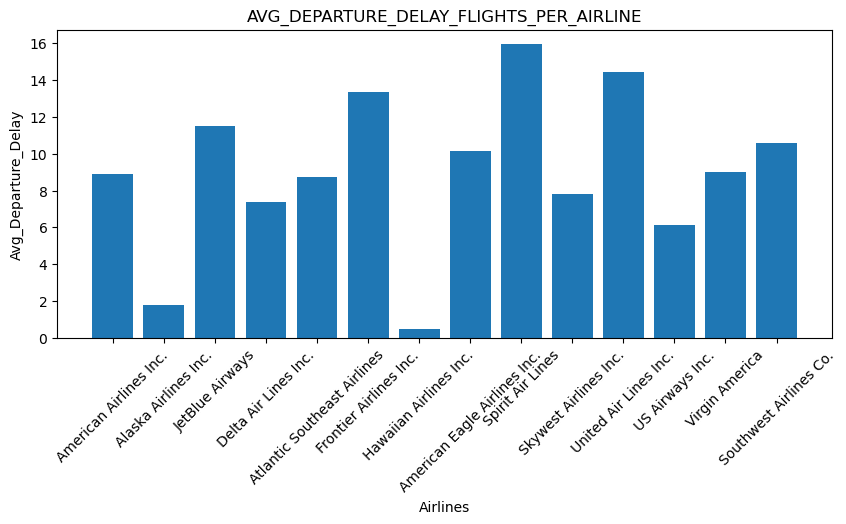

In [151]:
axis = plt.subplots(figsize=(10,4))
Airlines=AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE['AIRLINE']
Flight_Cancel=AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE ['Delay']
plt.xlabel('Airlines')
plt.ylabel('Avg_Departure_Delay')
plt.bar(Airlines,Flight_Cancel)
plt.xticks(rotation=45)
plt.title('AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE')
plt.show

In [152]:
AVG_DEPARTURE_DELAY_BY_MONTH = pd.read_sql_query(
    '''
WITH DEPARTURE_DELAY_FLIGHTS AS(SELECT AIRLINE,DEPARTURE_DELAY,MONTH FROM flights)
SELECT DDF.MONTH as MONTH, AVG(DDF.DEPARTURE_DELAY) as Delay FROM DEPARTURE_DELAY_FLIGHTS DDF 
INNER JOIN airlines al ON DDF.AIRLINE = al.IATA_CODE 
GROUP BY DDF.MONTH
'''
, conn)
AVG_DEPARTURE_DELAY_BY_MONTH  

,MONTH,Delay
0,1,9.759471
1,2,11.885284
2,3,9.660903
3,4,7.721885
4,5,9.454144
5,6,13.986016
6,7,11.394664
7,8,9.932045
8,9,4.823560
9,10,4.982661


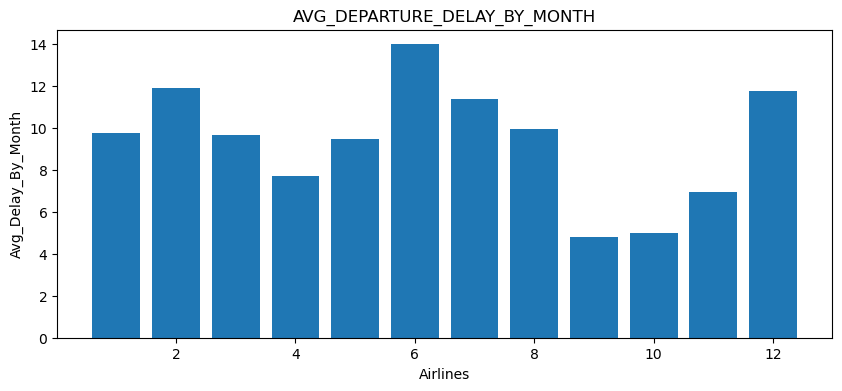

In [156]:
axis = plt.subplots(figsize=(10,4))
Airlines=AVG_DEPARTURE_DELAY_BY_MONTH['MONTH']
Flight_Cancel=AVG_DEPARTURE_DELAY_BY_MONTH['Delay']
plt.xlabel('Airlines')
plt.ylabel('Avg_Delay_By_Month')
plt.bar(Airlines,Flight_Cancel)

plt.title('AVG_DEPARTURE_DELAY_BY_MONTH')
plt.show()

In [160]:

No_of_AIRLINE_Delays_By_Airline = pd.read_sql_query(
    '''
SELECT  count(*) as Delay, al.Airline, (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) AS total_flights FROM flights f INNER JOIN airlines al ON f.AIRLINE = al.IATA_CODE 
where  AIRLINE_DELAY > 0 
group by f.AIRLINE
'''
, conn)
No_of_AIRLINE_Delays_By_Airline.sort_values('Delay',ascending=False)

,Delay,AIRLINE,total_flights
13,144524,Southwest Airlines Co.,1261855
0,68656,American Airlines Inc.,725984
10,65999,United Air Lines Inc.,515723
3,63128,Delta Air Lines Inc.,875881
4,53943,Atlantic Southeast Airlines,571977
9,39127,Skywest Airlines Inc.,588353
2,38665,JetBlue Airways,267048
7,27236,American Eagle Airlines Inc.,294632
11,19717,US Airways Inc.,198715
8,17307,Spirit Air Lines,117379


###### To calculate the percentage of airline delays, we divide the count of airline delays by the total number of flights for each airline and then multiply by 100. Here are the percentages of airline delays for each airline:

American Airlines Inc.: 9.45% Alaska Airlines Inc.: 4.85% JetBlue Airways: 14.48% Delta Air Lines Inc.: 7.21% Atlantic Southeast Airlines: 9.43% Frontier Airlines Inc.: 12.68% Hawaiian Airlines Inc.: 9.67% American Eagle Airlines Inc.: 9.24% Spirit Air Lines: 14.74% Skywest Airlines Inc.: 6.65% United Air Lines Inc.: 12.80% US Airways Inc.: 9.91% Virgin America: 7.18% Southwest Airlines Co.: 11.46%  

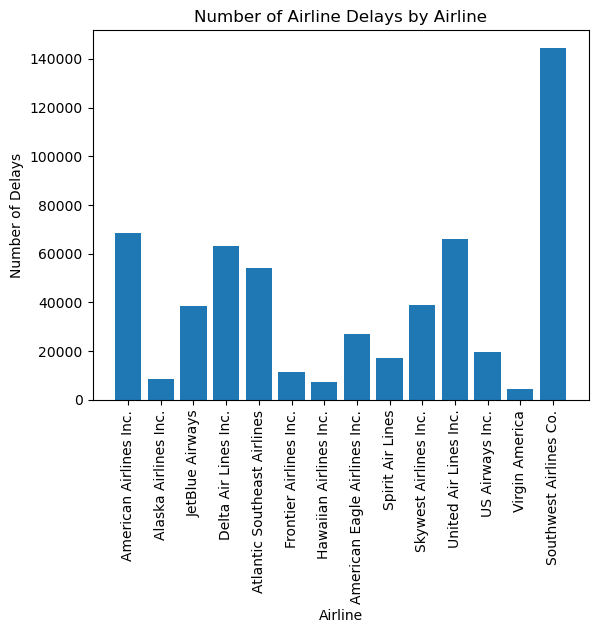

In [162]:
plt.bar(No_of_AIRLINE_Delays_By_Airline['AIRLINE'], No_of_AIRLINE_Delays_By_Airline['Delay'])


plt.title('Number of Airline Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')


plt.xticks(rotation=90)

# Display the chart
plt.show()


## Flights_cancelled_per_Airports

In [163]:
No_Of_Flights_Cancelled_per_Airport = pd.read_sql_query(
    '''
SELECT ORIGIN_AIRPORT, COUNT(*) AS CancelledFlights
FROM flights
WHERE CANCELLED > 0
GROUP BY ORIGIN_AIRPORT
order by CancelledFlights desc
LIMIT 10;


     ''', conn)
No_Of_Flights_Cancelled_per_Airport

,ORIGIN_AIRPORT,CancelledFlights
0,ORD,8548
1,DFW,6254
2,LGA,4531
3,EWR,3110
4,BOS,2654
5,ATL,2557
6,LAX,2164
7,SFO,2148
8,IAH,2130
9,DEN,2123


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ORD'),
  Text(1, 0, 'DFW'),
  Text(2, 0, 'LGA'),
  Text(3, 0, 'EWR'),
  Text(4, 0, 'BOS'),
  Text(5, 0, 'ATL'),
  Text(6, 0, 'LAX'),
  Text(7, 0, 'SFO'),
  Text(8, 0, 'IAH'),
  Text(9, 0, 'DEN')])

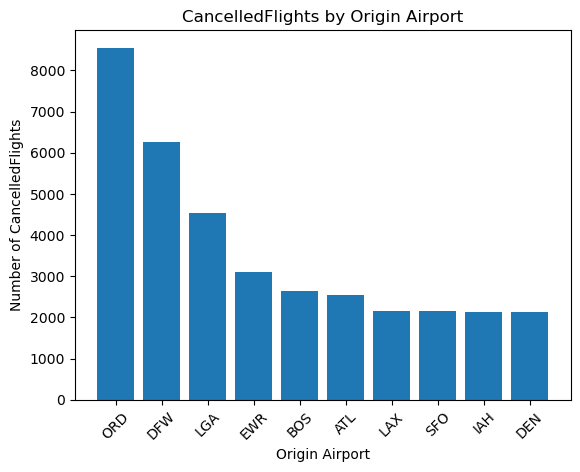

In [164]:
plt.bar(No_Of_Flights_Cancelled_per_Airport['ORIGIN_AIRPORT'], No_Of_Flights_Cancelled_per_Airport['CancelledFlights'])
plt.xlabel('Origin Airport')
plt.ylabel('Number of CancelledFlights')
plt.title('CancelledFlights by Origin Airport')
plt.xticks(rotation=45)  
     